# Logarithm transformation




In [114]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing #our dataset

In [115]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

#X.shape
#20640 rows, 8 columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


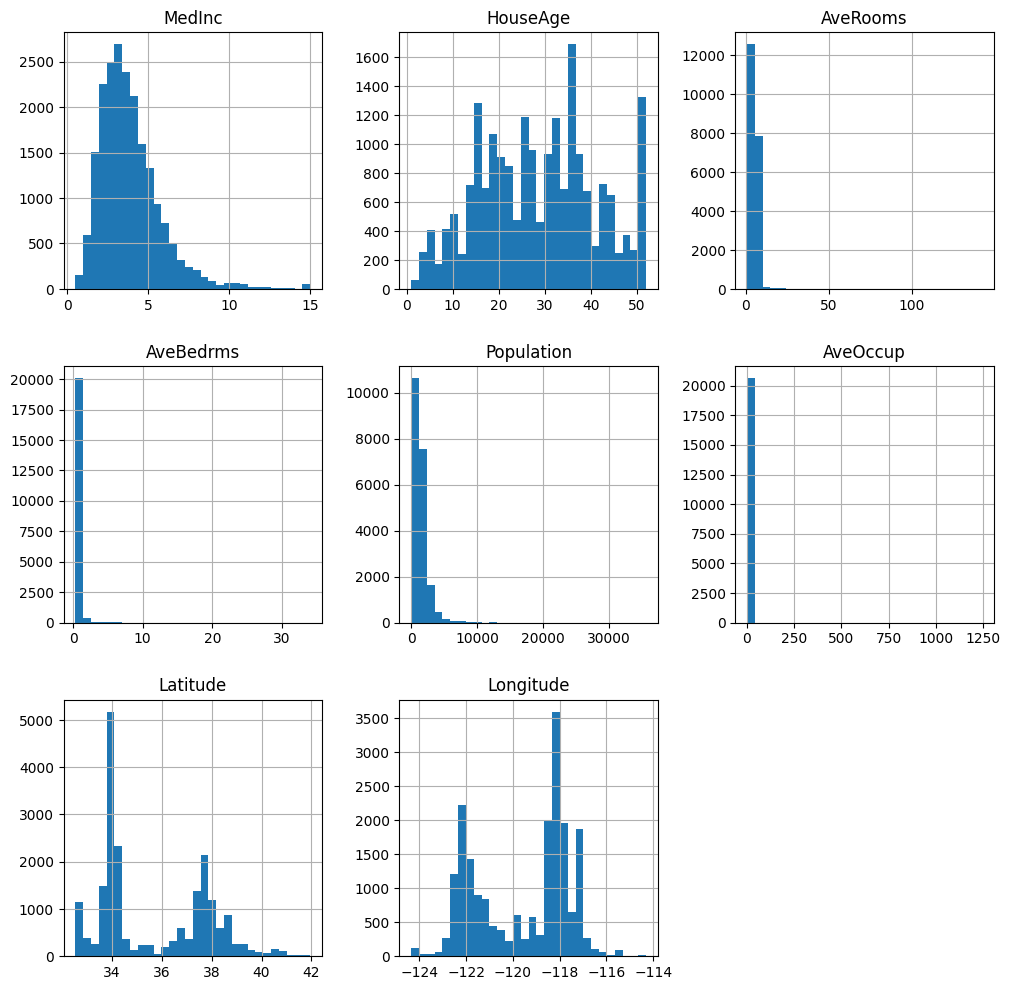

In [116]:
# Plot histograms of these 8 columns

X.hist(bins=30, figsize=(12, 12))
plt.show()

In [117]:
# Plot histogram and Q-Q plots to explore the variable distribution


def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

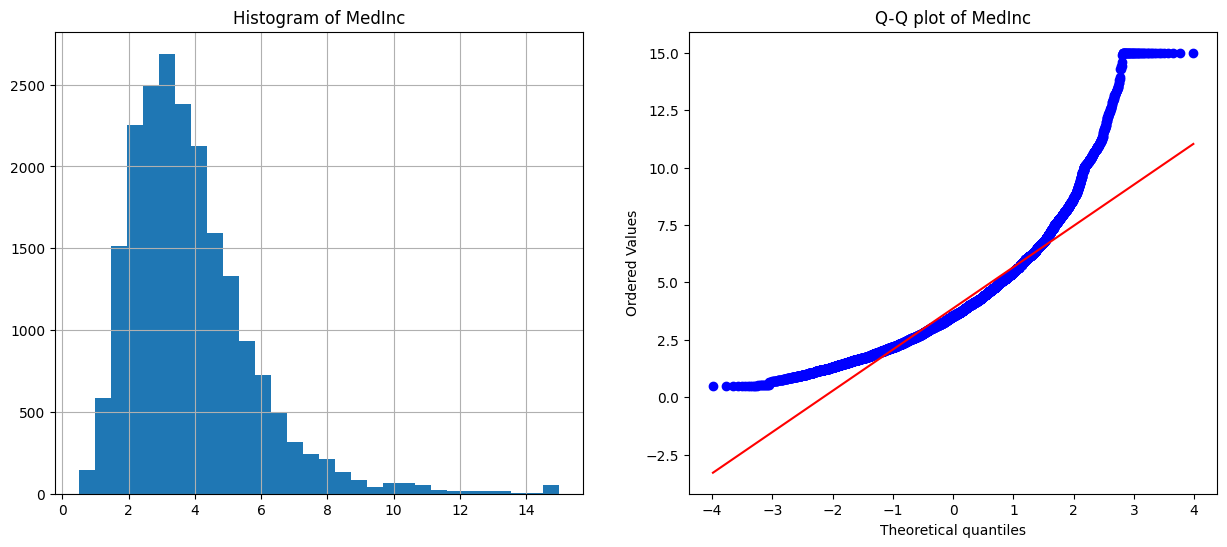

In [118]:
# Check the MedInc column's plot histogram and Q-Q plot

diagnostic_plots(X, "MedInc")

### The plot histogram for MenInc column tells

1.The distribution is RIGHT-SKEWED (positively skewed)
2. Not normally distributed

### The Q-Q plot for MedInc column tells

1. Strong upward curvature in the right tail
2. The data deviates from the line at both ends (for normally distributed data, blue line follows red line)

Conclusion from Q–Q plot:
👉 The data is NOT normally distributed.
👉 It is right-skewed with heavy tails.
👉 There are high-income outliers.



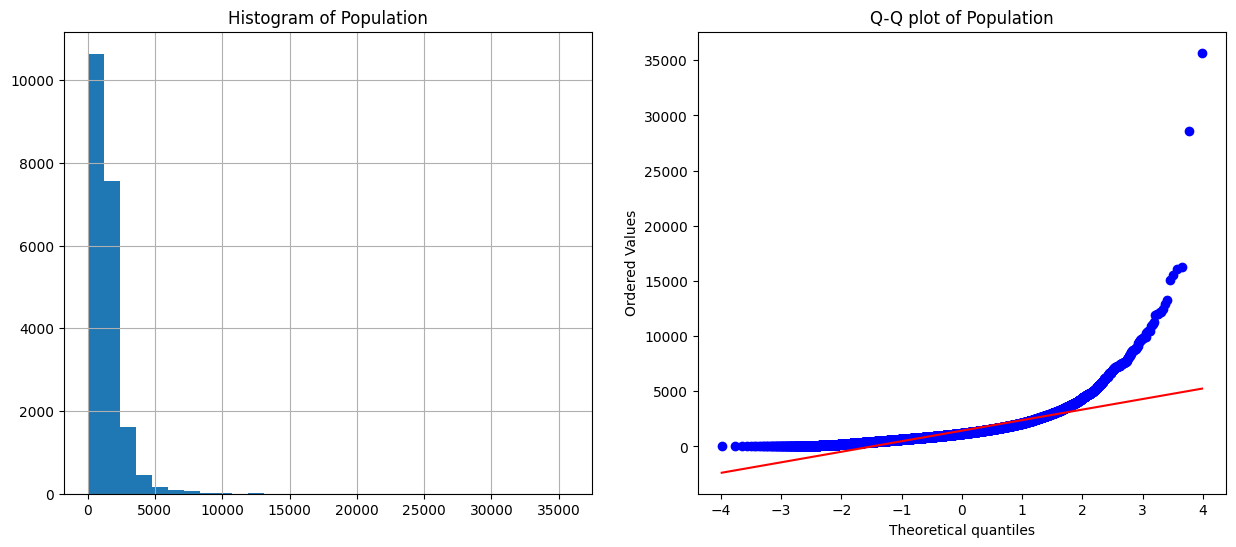

In [119]:
diagnostic_plots(X, "Population")

# Logarithmic transformation with NumPy

In [120]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [121]:
# list with the variables to transform

variables = ["MedInc", "AveRooms", "AveBedrms", "Population"] #4 columns

In [122]:
# apply log to a set of variables

X_tf[variables] = np.log(X[variables])

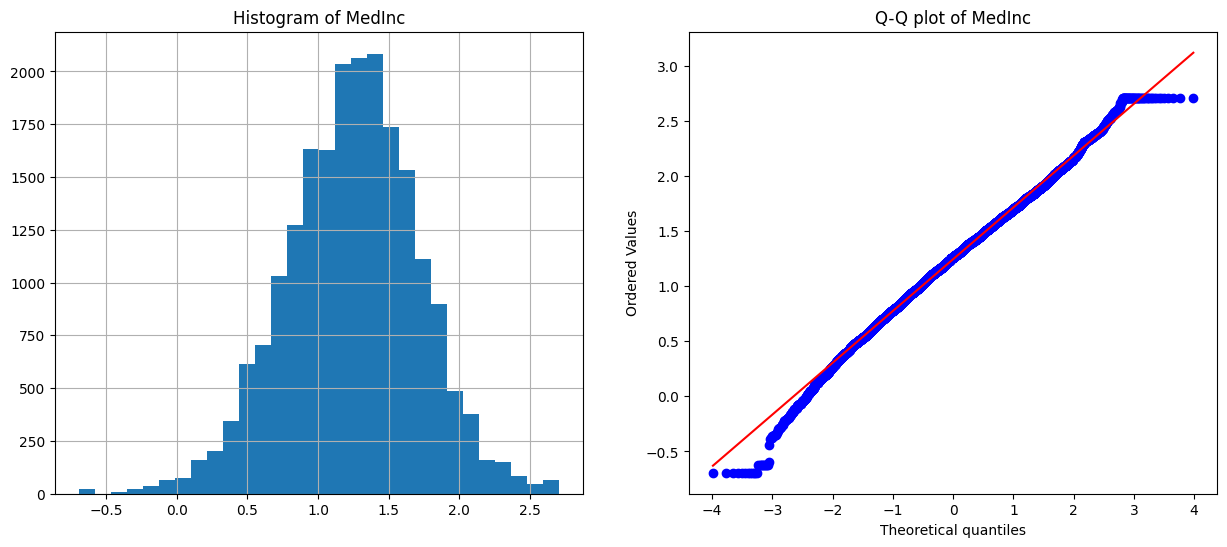

In [123]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")

### Now the Q-Q plot for MedInc column is somewhat better than before.

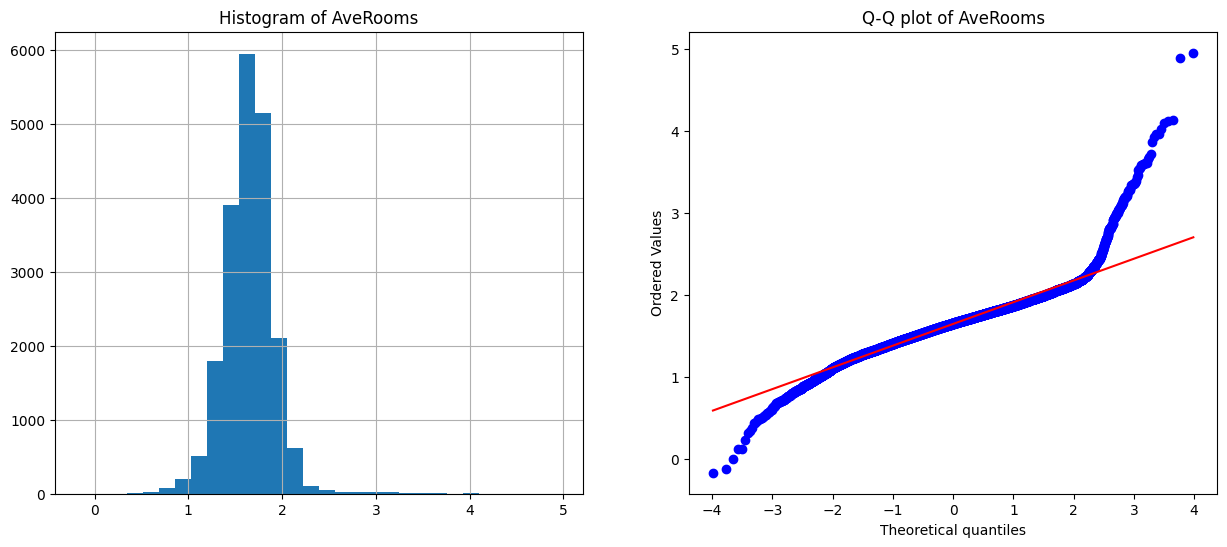

In [124]:
diagnostic_plots(X_tf, "AveRooms")

### this one isn't that perfect still many blue dots now follow the red one

# Logarithm plus constant (Optional)

If you want to add a constant to the variables, say because some of their values are 0 or negative, this is how to do it.

In [125]:
# make a copy of original data

X_tf = X.copy()

In [126]:
# apply log plus a constant to a set of variables
# we can also use np.log1p()

X_tf[variables] = np.log(X[variables] + 1) # constant 1 added here

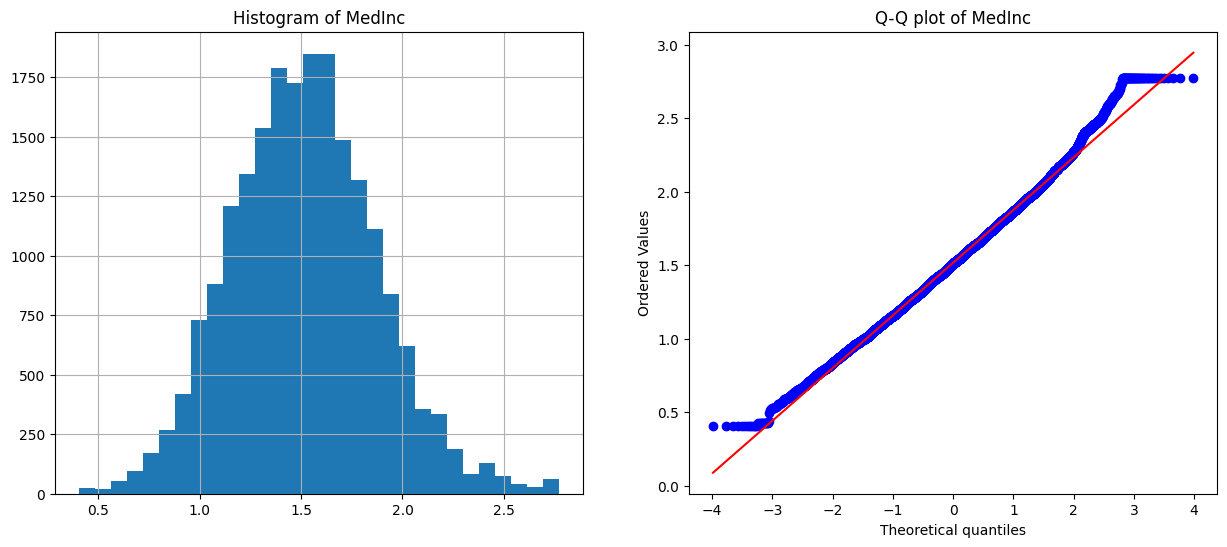

In [127]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")